In [1]:
# note on high redshift standardizable candles

In [2]:
%matplotlib notebook

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
#from MyUnit import NaturalUnit
import numpy as np
import sys,os
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.integrate import quad

#path = '/home/chensun/tomerv_storage/quasars_master/'
#sys.path.insert(0, path)
path = '/home/chen/Code/'
sys.path.insert(0, path)
from quasars_a2a3 import igm as ig
from quasars_a2a3 import data as dt
from quasars_a2a3 import chi2 as ch
from quasars_a2a3 import cosmo as co

from ag_probs import omega_plasma

# Load the data

In [5]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=0.,
                       Gamma_up=100.)
                       
(qso_name_raw_arr,
 qso_z_raw_arr,
 qso_f2500_raw_arr,
 qso_df2500_raw_arr,
 qso_f2keV_raw_arr,
 qso_df2keV_low_raw_arr,
 qso_df2keV_up_raw_arr,
 qso_Gamma_raw_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [6]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=1.2,
                       Gamma_up=100)
(qso_name_arr,
 qso_z_arr,
 qso_f2500_arr,
 qso_df2500_arr,
 qso_f2keV_arr,
 qso_df2keV_low_arr,
 qso_df2keV_up_arr,
 qso_Gamma_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [7]:
pan_data = dt.load_pantheon('./likelihoods',
                   'lcparam_full_long.dat',
                   'sys_full_long.dat',
                   1048,
                   True)

In [8]:
ch.use_loglkl = True

In [9]:
# constructe the kwargs
# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

pan_kwargs = {'B': 1,
              'mg': omega_plasma(1.6e-8),
              's': 1,
              'omega': 1, # [eV]
              'axion_ini_frac': 0.,
              'smoothed': False,
              'redshift_dependent': True,
              'method': 'simps',
              'prob_func': 'norm_log',
              'Nz': 101,
              'skip_LumMod': False}

# Check the fit variable directly

-134.41078919864114


<IPython.core.display.Javascript object>


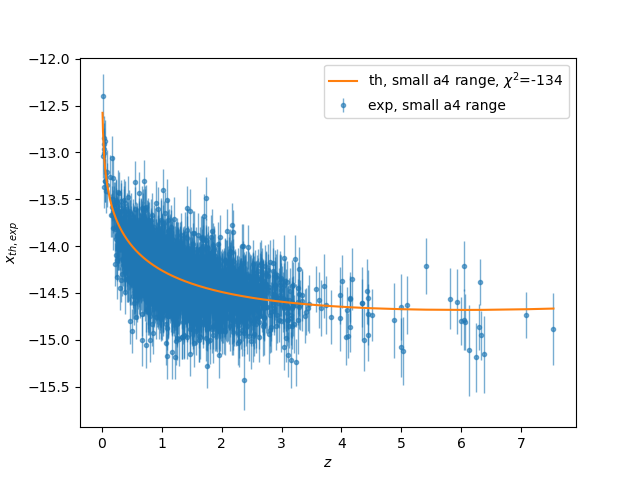

In [10]:
# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)
x = (_, _, 0.7, 3.37, 3.09, -5.5, 0.62, 7.66, 0.23)

# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.0, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.08)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 8)


ch.use_loglkl = True

(chi2, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2)

plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp, small a4 range', linewidth=1, alpha=0.6)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='th, small a4 range, $\chi^2$=%.0f' %chi2)


#plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

-119.2968532613962


<IPython.core.display.Javascript object>


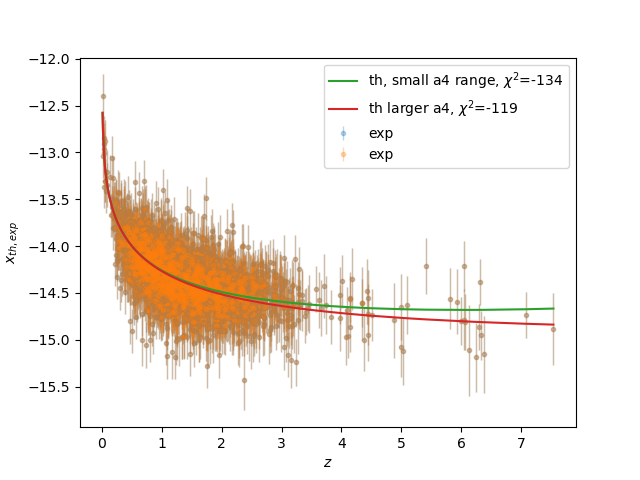

In [11]:
# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)
# Lusso's best fit with SNe + quasars
x = (_, _, 0.7, 3.37, 3.09, -3.5, 0.62, 7.66, 0.23)


(chi2_1, 
 mu_th_1_arr, 
 mu_exp_1_arr, 
 sigma_1_arr,
 qso_z_1_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_1)

plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
plt.errorbar(qso_z_1_arr, mu_exp_1_arr, sigma_1_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='th, small a4 range, $\chi^2$=%.0f' %chi2)

x, y = zip(*sorted(zip(qso_z_1_arr, mu_th_1_arr)))
plt.plot(x, y, '-', zorder=10, label='th larger a4, $\chi^2$=%.0f' %chi2_1)



#plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

<IPython.core.display.Javascript object>


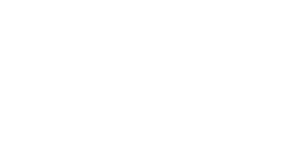

No handles with labels found to put in legend.


In [12]:
dm_fig, dm_ax = plt.subplots()
plt.ylabel('$\mu_{th, exp}$')
plt.xlabel('$z$')
plt.legend()
plt.close()

<IPython.core.display.Javascript object>


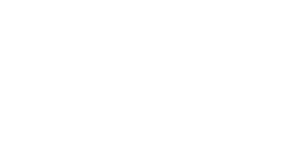

<IPython.core.display.Javascript object>


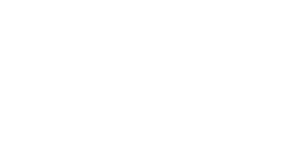

<IPython.core.display.Javascript object>


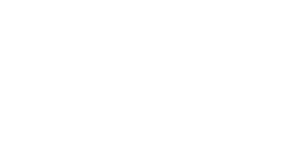

In [13]:
residual_fig, residual_ax = plt.subplots()
plt.title('our best fit, PAN+QSO')
plt.ylabel('$\sigma$')
plt.xlabel('$z$')
plt.close()

residual2_fig, residual2_ax = plt.subplots()
# plt.title('a4 from Lusso, PAN+QSO')
plt.title('a4 larger range, PAN+QSO')
plt.ylabel('$\sigma$')
plt.xlabel('$z$')
plt.close()

residual3_fig, residual3_ax = plt.subplots()
plt.title('a4 from Lusso, PAN+QSO')
# plt.title('a4 larger range, PAN+QSO')
plt.ylabel('$\sigma$')
plt.xlabel('$z$')
plt.close()

# Distance Modulus

In [14]:
def binning(y, dyraw, delta=0):
    dy = np.sqrt(dyraw**2 + delta**2)
    dybar = 1/np.sqrt(np.sum(1/dy**2))
    ybar = np.sum(y/dy**2) * dybar**2
    return ybar, dybar

bins_lowz = np.arange(0.01, 2, 0.1) 
bins_highz = np.arange(2, 10, 0.5)
bins = np.concatenate((bins_lowz, bins_highz))


In [15]:
# do distance modulus instead, so that the data points don't shift 


# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)
# -Lusso's best fit with SNe + quasars-

# previous fit (small a4 range)
x = (_, _, 0.7, 3.37, 3.09, -5.2, 0.62, 7.66, 0.23)
#x = (_, _, 0.7, 3.09, 4.83, -7.78, 0.62, 7.69, 0.23)




(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)


# check pantheon chi2:
# (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
x = (_, _, 0.7, 3.37, 3.09, -5.2, -19.38)
print("Pantheon -2log(likelihood):", ch.chi2_Pantheon(x,
                                                      data=pan_data,
                                                        vectorize=True,
                                                       **pan_kwargs))

# compute the error bar size for the distance modulus

qso_dbeta = 0.3
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



quasars -2log(likelihood): -134.54349245405086
Pantheon -2log(likelihood): -1160.737779839108


In [16]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp, (small a4 range)', linewidth=1, alpha=0.3)
# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, fmt='.', label='exp binned, (small a4 range)', linewidth=1, zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='small a4 range, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
residual_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
                     fmt='.', 
                     ecolor='C0',
                     label='exp', 
                     linewidth=1, 
                     zorder=10, 
                     alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='r-', 
                     ecolor='r', 
                     label='exp', linewidth=1, zorder=11)
residual_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
residual_ax.set_title('small a4 range')

<ipython-input-14-1f59ac651f57>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-14-1f59ac651f57>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


Text(0.5, 1.0, 'small a4 range')

In [17]:
# do distance modulus instead, so that the data points don't shift 


# x = (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)

# our best fit (large a4 range) run045
a2, a3, a4, h0, M0, qso_gamma, qso_beta, qso_delta = \
tuple([  3.03628631,   5.1205381 ,  -8.22939399,   0.70916448,
       -19.33086951,   0.61896352,   7.67155186,   0.22593313])
x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)





(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)


# check pantheon chi2:
# (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
x = (_, _, h0, a2, a3, a4, M0)
print("Pantheon -2log(likelihood):", ch.chi2_Pantheon(x,
                                                      data=pan_data,
                                                        vectorize=True,
                                                       **pan_kwargs))

# compute the error bar size for the distance modulus

qso_dbeta = 0.28
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



quasars -2log(likelihood): -142.9001534443872
Pantheon -2log(likelihood): -1166.011202364181


In [18]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp, run45', linewidth=1, alpha=0.3)
# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, fmt='.', label='exp binned, run45', linewidth=1, zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='bf large a4 (run45), -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
residual2_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
                     fmt='.', 
                     ecolor='C0',
                     #label='exp', 
                     linewidth=1, 
                     zorder=10, 
                     alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
residual2_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='r-', 
                     ecolor='r', 
                     label='our best fit', linewidth=1, zorder=11)
residual2_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
residual2_ax.set_title('bf large a4 (run45)')

<ipython-input-14-1f59ac651f57>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-14-1f59ac651f57>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


In [19]:
# Lusso's best fit (run 046) fix to Lusso value and fit the rest

a2, a3, a4, h0, M0, qso_gamma, qso_beta, qso_delta = \
tuple([  3.075, 4.466, -3.716, 0.62383106, 
       -19.62041329,   0.64501508,   6.9447847 , 0.22796074])
x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)




(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)


# check pantheon chi2:
# (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
#x = (_, _, 0.7, 3.37, 3.09, -5.2, -19.38)
x = (_, _, h0, a2, a3, a4, M0)
print("Pantheon -2log(likelihood):", ch.chi2_Pantheon(x,
                                                      data=pan_data,
                                                        vectorize=True,
                                                       **pan_kwargs))

# compute the error bar size for the distance modulus

qso_dbeta = 0.24
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



quasars -2log(likelihood): -104.52149815027099
Pantheon -2log(likelihood): -1175.9106673083052


In [20]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp, Lusso (run46)', linewidth=1, alpha=0.3)
# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, fmt='.', label='exp binned, Lusso (run46)', linewidth=1, zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='Lusso (run46), -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)
residual3_ax.errorbar(x, (y-yexp)/dy, [0]*len(dy), 
                     fmt='.', 
                     ecolor='C0',
                     label='exp', 
                     linewidth=1, 
                     zorder=10, 
                     alpha=0.4)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
residual3_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='r-', 
                     ecolor='r', 
                     label='Lusso et al.', linewidth=1, zorder=11)

residual2_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='C4-', 
                     ecolor='C4', 
                     label='Lusso et al.', linewidth=1, zorder=11)

residual3_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')
residual3_ax.set_title('Lusso (run46)')


<ipython-input-14-1f59ac651f57>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-14-1f59ac651f57>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


Text(0.5, 1.0, 'Lusso (run46)')

<IPython.core.display.Javascript object>


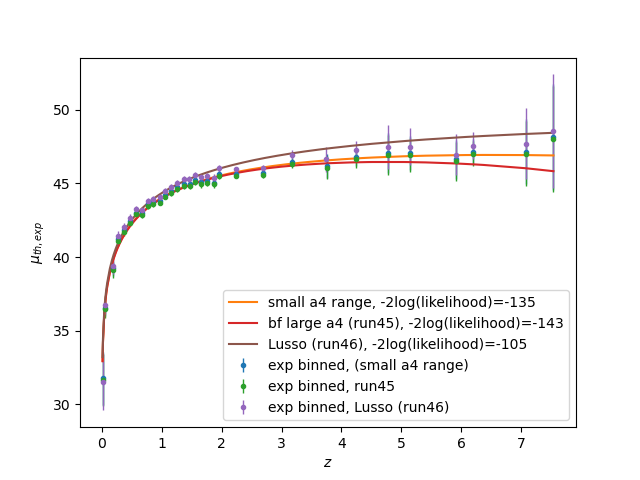

In [21]:
dm_fig

<IPython.core.display.Javascript object>


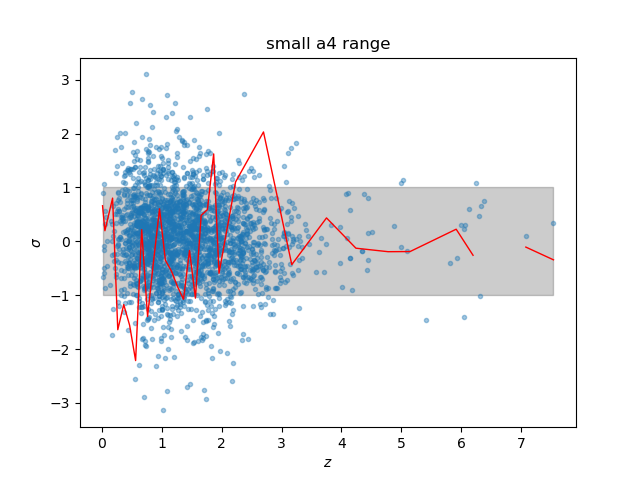

In [22]:
residual_fig

<IPython.core.display.Javascript object>


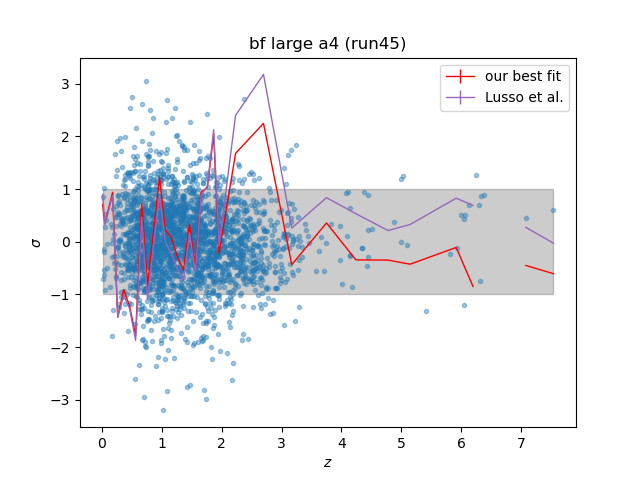

In [25]:
residual2_ax.legend()
residual2_fig

<IPython.core.display.Javascript object>


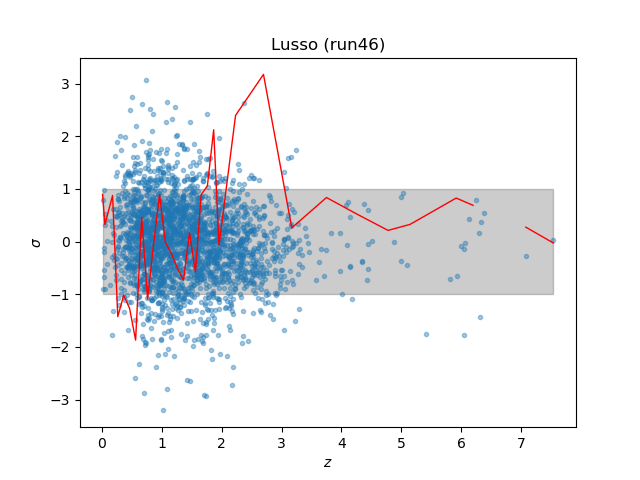

In [24]:
residual3_fig